In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [15]:
# Load the training data
train_data = pd.read_csv('mnist_train.csv') # the training set is with headers

# Manually set column names for training data
train_column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = train_column_names

# Ensure all training data is numeric
train_data = train_data.apply(pd.to_numeric, errors='coerce')
if train_data.isnull().values.any():
    nan_indices = train_data[train_data.isnull().any(axis=1)].index
    print(f"Non-numeric values found in the training data at rows: {list(nan_indices)}")
    train_data = train_data.fillna(0)

# Separate features and labels for training data
y_train = train_data['label'].values
# y_train = train_data.iloc[:,0].values
X_train = train_data.drop('label', axis=1).values.astype(np.float32) / 255.0
# X_train = train_data.values.astype(np.float32) / 255.0

# Convert training data to torch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train, dtype=torch.long)

# Create custom dataset class
class MNISTDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create training dataset and dataloader
train_dataset = MNISTDataset(X_train, y_train)
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


NaN values found in the test data at rows: [8042]
Epoch 1/20
Train Loss: 0.3128 Acc: 0.9087
Val Loss: 0.1468 Acc: 0.9554
Epoch 2/20
Train Loss: 0.1055 Acc: 0.9676
Val Loss: 0.1047 Acc: 0.9669
Epoch 3/20
Train Loss: 0.0699 Acc: 0.9781
Val Loss: 0.0931 Acc: 0.9703
Epoch 4/20
Train Loss: 0.0499 Acc: 0.9837
Val Loss: 0.0830 Acc: 0.9739
Epoch 5/20
Train Loss: 0.0379 Acc: 0.9881
Val Loss: 0.0825 Acc: 0.9753
Epoch 6/20
Train Loss: 0.0297 Acc: 0.9904
Val Loss: 0.0873 Acc: 0.9741
Epoch 7/20
Train Loss: 0.0253 Acc: 0.9915
Val Loss: 0.0793 Acc: 0.9769
Epoch 8/20
Train Loss: 0.0216 Acc: 0.9925
Val Loss: 0.0944 Acc: 0.9765
Epoch 9/20
Train Loss: 0.0171 Acc: 0.9945
Val Loss: 0.0825 Acc: 0.9770
Epoch 10/20
Train Loss: 0.0143 Acc: 0.9954
Val Loss: 0.0751 Acc: 0.9810
Epoch 11/20
Train Loss: 0.0125 Acc: 0.9957
Val Loss: 0.0877 Acc: 0.9787
Epoch 12/20
Train Loss: 0.0160 Acc: 0.9947
Val Loss: 0.0899 Acc: 0.9802
Epoch 13/20
Train Loss: 0.0136 Acc: 0.9956
Val Loss: 0.0883 Acc: 0.9815
Epoch 14/20
Train Loss:

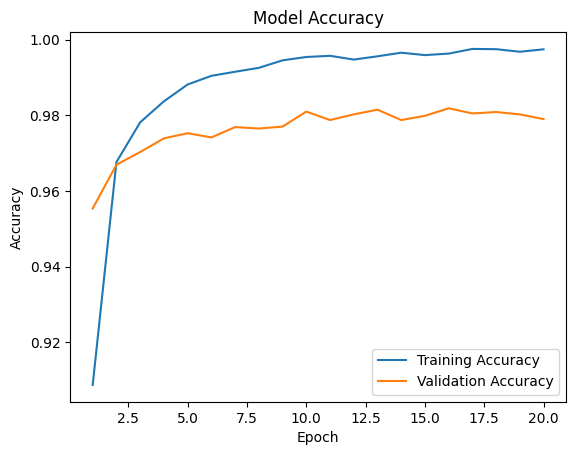

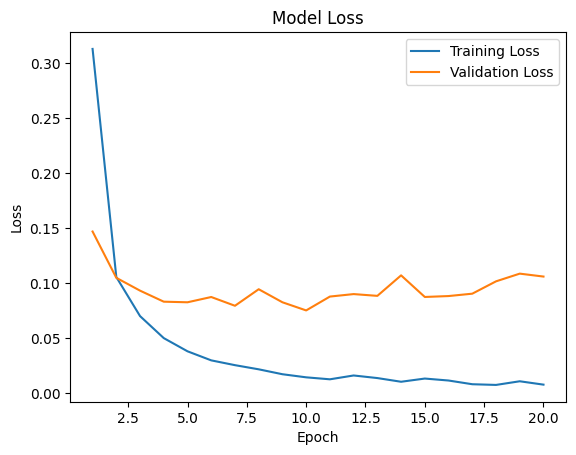

In [17]:

# Load the test data
test_data = pd.read_csv('Project_Data_EE4C12_CE_IMG.csv', header=None)

# Manually set column names for test data
test_column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
test_data.columns = test_column_names

# Check for NaN values in the test data and replace them with 0
if test_data.isnull().values.any():
    nan_indices = test_data[test_data.isnull().any(axis=1)].index
    print(f"NaN values found in the test data at rows: {list(nan_indices)}")
    test_data = test_data.fillna(0)

# Ensure all test data is numeric
test_data = test_data.apply(pd.to_numeric, errors='coerce')
if test_data.isnull().values.any():
    nan_indices = test_data[test_data.isnull().any(axis=1)].index
    print(f"Non-numeric values found in the test data after conversion at rows: {list(nan_indices)}")
    test_data = test_data.fillna(0)

# Separate features and labels for test data
y_test = test_data['label'].values
X_test = test_data.drop('label', axis=1).values.astype(np.float32) / 255.0

# Convert test data to torch tensors
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create test dataset and dataloader
test_dataset = MNISTDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
model = MNISTModel()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Phase (using test data)
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    with torch.no_grad():
        for val_inputs, val_labels in test_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            outputs = model(val_inputs)
            loss = criterion(outputs, val_labels)
            _, preds = torch.max(outputs, 1)
            val_running_loss += loss.item() * val_inputs.size(0)
            val_running_corrects += torch.sum(preds == val_labels.data)
    val_epoch_loss = val_running_loss / len(test_dataset)
    val_epoch_acc = val_running_corrects.double() / len(test_dataset)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    print(f'Val Loss: {val_epoch_loss:.4f} Acc: {val_epoch_acc:.4f}')

# Plot accuracy
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'mnist_dnn_model.pth')